In [22]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot
from torchinfo import summary

In [24]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

In [1]:
import omx

In [10]:
file_name = "Methane"
fname = f"{file_name}.dat"
mdname = f"{file_name}.md"
atom_names, atom_numbs, atom_types, cells = omx.load_param_file(fname, mdname)
coords, steps = omx.load_data(mdname, atom_names, np.sum(atom_numbs))
energy, force = omx.to_system_label(fname, mdname)

In [6]:
class Net(nn.Module):
    def __init__(self,n_input,n_output,n_hidden):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

        # nn.init.constant_(self.l1.weight, 1.0)
        # nn.init.constant_(self.l1.bias, 1.0)

    def forward(self,x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [16]:
inputs=torch.tensor(coords.reshape(200,-1)).float()
labels=torch.tensor(energy).float().view((-1,1))

In [17]:
inputs.shape,labels.shape

(torch.Size([200, 15]), torch.Size([200, 1]))

In [18]:
n_input=inputs.shape[1]
lr=0.001 #学習率の変更
net=Net(n_input,1,10)
criterion=nn.MSELoss()
optimizer=optim.SGD(net.parameters(),lr=lr)
num_epochs=10000
history=np.zeros((0,2))

In [20]:
for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs=net(inputs)

    loss=criterion(outputs,labels)

    loss.backward()

    optimizer.step()

    if epoch%100==0:
        history=np.vstack((history,np.array([epoch,loss.item()])))
        if epoch%1000==0:
            print(f"{epoch},{loss}")

0,49810.578125
1000,948.7898559570312
2000,17.310773849487305
3000,0.3184973895549774
4000,0.008456069976091385
5000,0.002794953528791666
6000,0.0027000673580914736
7000,0.0027000673580914736
8000,0.0027000673580914736
9000,0.0027000673580914736


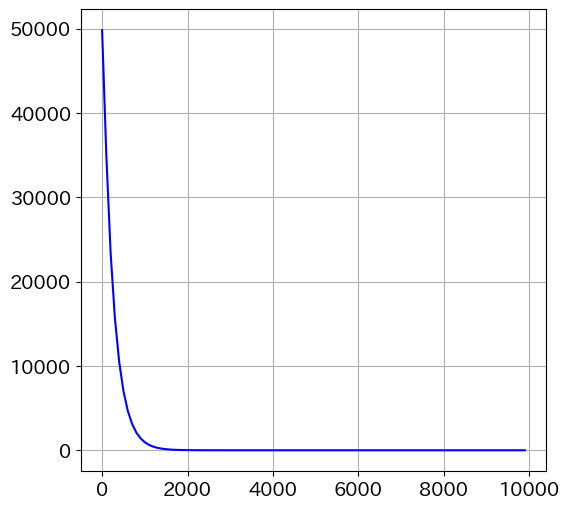

In [25]:
plt.plot(history[:,0],history[:,1],"b")

In [36]:
outputs_np=outputs.detach().numpy()
labels_np=labels.detach().numpy()

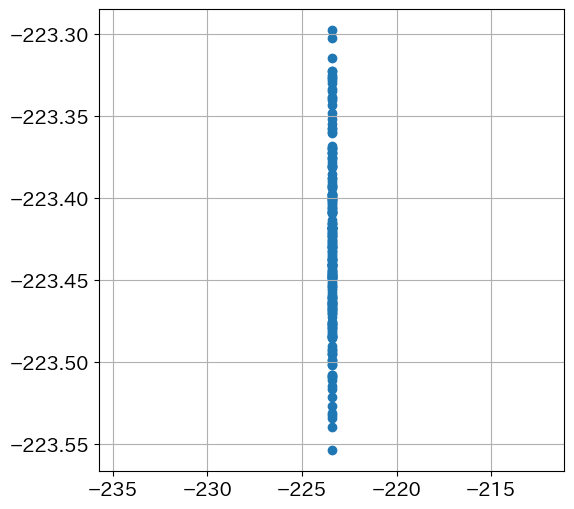

In [46]:
plt.scatter(outputs_np,labels_np)
x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])
# plt.plot(x_range, x_range, "r--", linewidth=0.25)